### Made by Manthan A Panchal
email = panchalmanthan22@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-darkgrid')
%matplotlib inline
pd.set_option('Display.max_rows', None)

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.shape

(30, 2)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

Text(0, 0.5, 'Frequency')

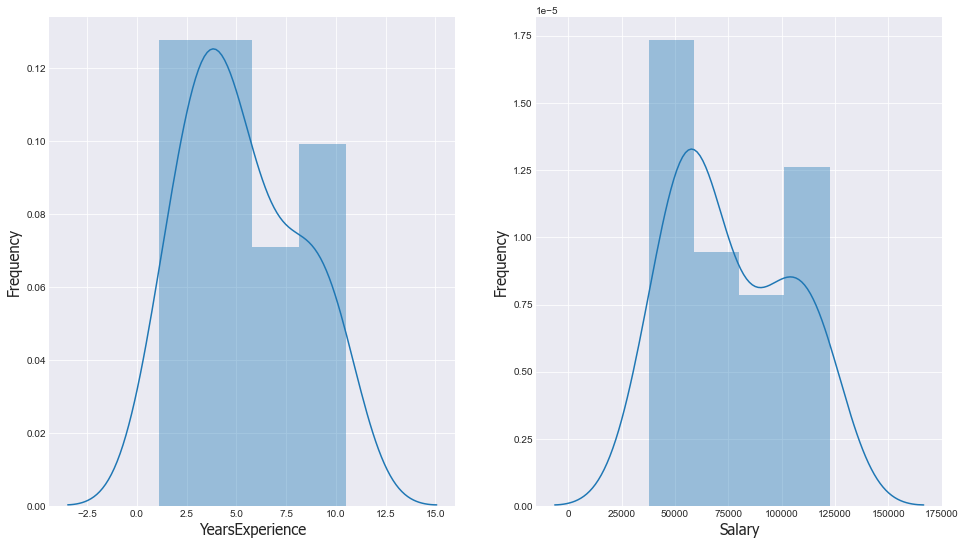

In [7]:
plt.figure(figsize=(16,9))

plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])
plt.xlabel('YearsExperience',  fontdict={'fontname':'Tahoma', 'fontsize':15})
plt.ylabel('Frequency',  fontdict={'fontname':'Tahoma', 'fontsize':15})


plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.xlabel('Salary',  fontdict={'fontname':'Tahoma', 'fontsize':15})
plt.ylabel('Frequency',  fontdict={'fontname':'Tahoma', 'fontsize':15})


we can see that the two graphs have somewhat similar distribution of values 
the shape is identical with just few exceptions


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


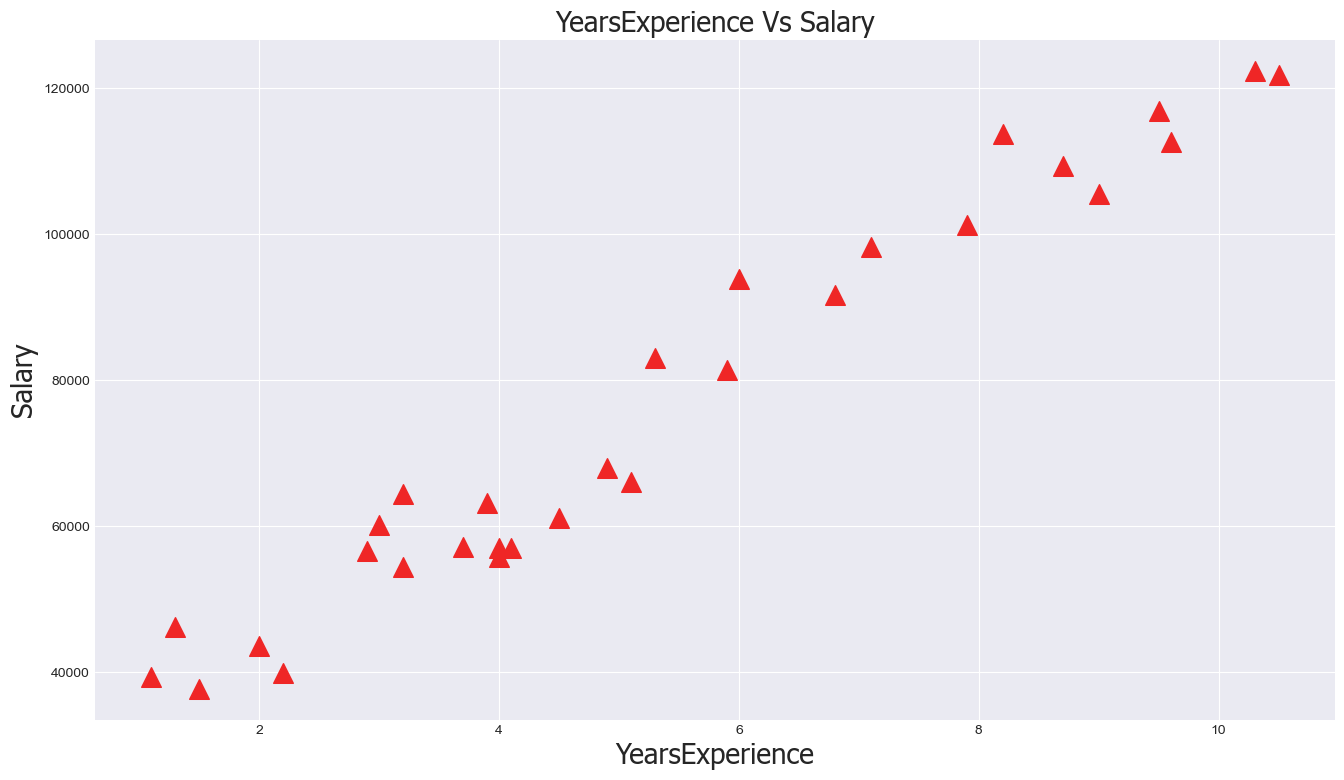

In [13]:
plt.figure(figsize=(16,9), dpi=100)

plt.scatter(df['YearsExperience'], df['Salary'], color = '#ef2626', marker='^',s = 200)
plt.xlabel('YearsExperience',  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.ylabel('Salary' ,  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.title('YearsExperience Vs Salary', fontdict={'fontname':'Tahoma', 'fontsize':20})

plt.show()

## upon observation it is clear that the two variables have a linear positive relationship 
and the numbers confirm then 

## Model Building 

In [11]:
import statsmodels.formula.api as smf

In [25]:
crude = smf.ols('Salary~YearsExperience', data = df).fit()

In [26]:
crude.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
crude.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.14e-20
Time:                        00:18:19   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The r squared values are overly optimistic  

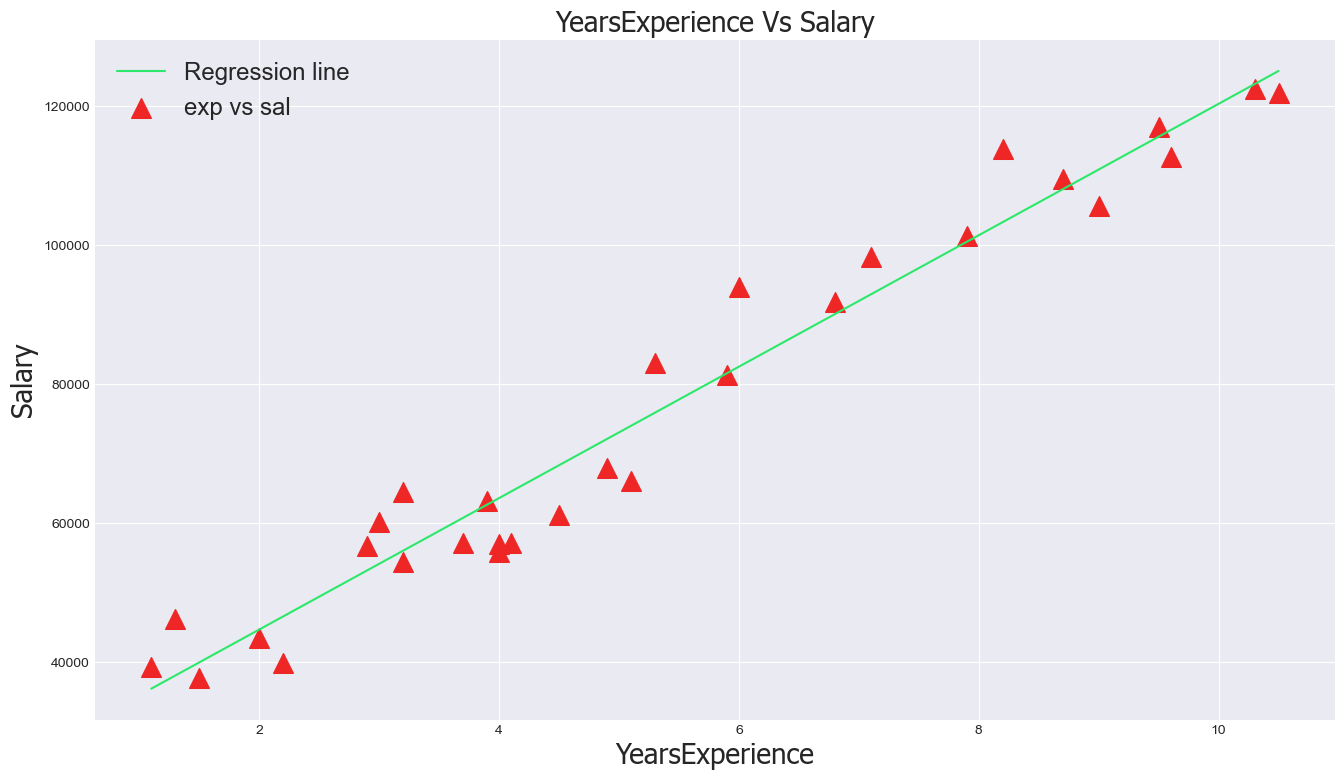

In [30]:
plt.figure(figsize=(16,9), dpi=100)

# Equation of the regression Line
x = df['YearsExperience']
#y2 = mx +c
y2  = 9449.962321*x + 25792.200199

plt.scatter(df['YearsExperience'], df['Salary'], color = '#ef2626', marker='^',s = 200, label = 'exp vs sal')
plt.plot(x, y2 , color = '#2ce86a',label = 'Regression line')
plt.xlabel('YearsExperience',  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.ylabel('Salary' ,  fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.title('YearsExperience Vs Salary', fontdict={'fontname':'Tahoma', 'fontsize':20})
plt.legend(fontsize = 'xx-large')
plt.show()

In [33]:
new_data = [10, 15, 2, 6, 8, 7 ,5]
predict = pd.DataFrame(new_data)
predict.columns = ['YearsExperience']
predict

,YearsExperience
0,10
1,15
2,2
3,6
4,8
5,7
6,5


In [35]:
predict['Predicted'] =  crude.predict(predict)

In [36]:
predict

,YearsExperience,Predicted
0,10,120291.823413
1,15,167541.635020
2,2,44692.124842
3,6,82491.974127
4,8,101391.898770
5,7,91941.936449
6,5,73042.011806
